### Classification Models (A/B/C)

In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [11]:
from pathlib import Path

DATA_PATH = Path("..") / "data" / "raw" / "student-mat.csv"
df = pd.read_csv(DATA_PATH, sep=";")

In [12]:
df_model = df.drop(["G1", "G2"], axis=1)
df_encoded = pd.get_dummies(df_model, drop_first=True)

In [13]:
def categorize_grade (grade):
    if grade >= 15:
        return 'A'
    elif grade >= 10:
        return 'B'
    else:
        return 'C'
df_encoded['G3_cat'] = df_encoded['G3'].apply(categorize_grade)

In [14]:
le = LabelEncoder()
df_encoded['G3_cat_encoded'] = le.fit_transform(df_encoded['G3_cat'])

y_class = df_encoded['G3_cat_encoded']
X_class = df_encoded.drop(['G3', 'G3_cat', 'G3_cat_encoded'], axis=1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)



In [15]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_c),
    y=y_train_c
)

weights = np.array([class_weights[label] for label in y_train_c])
print(df_encoded['G3_cat_encoded'].value_counts())

G3_cat_encoded
1    192
2    130
0     73
Name: count, dtype: int64


In [16]:
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train_c, y_train_c)
y_pred_c_lr = clf_lr.predict(X_test_c)

print("--- Logistic Regression (Classification) ---")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c_lr))
print("Precision (weighted):", precision_score(y_test_c, y_pred_c_lr, average='weighted'))
print("Recall (weighted):   ", recall_score(y_test_c, y_pred_c_lr, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test_c, y_pred_c_lr, average='weighted'))
print("F1 Score (macro):   ", f1_score(y_test_c, y_pred_c_lr, average='macro'))
print("\nClassification Report (Logistic Regression):\n",
      classification_report(y_test_c, y_pred_c_lr, target_names=le.classes_))

--- Logistic Regression (Classification) ---
Accuracy: 0.4810126582278481
Precision (weighted): 0.5201520806153178
Recall (weighted):    0.4810126582278481
F1 Score (weighted): 0.48005902693426916
F1 Score (macro):    0.47754185381788483

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           A       0.64      0.35      0.45        20
           B       0.40      0.59      0.48        32
           C       0.57      0.44      0.50        27

    accuracy                           0.48        79
   macro avg       0.54      0.46      0.48        79
weighted avg       0.52      0.48      0.48        79



In [17]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_c, y_train_c)
y_pred_c_rf = clf_rf.predict(X_test_c)

print("--- Random Forest (Classification) ---")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c_rf))
print("Precision (weighted):", precision_score(y_test_c, y_pred_c_rf, average='weighted'))
print("Recall (weighted):   ", recall_score(y_test_c, y_pred_c_rf, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test_c, y_pred_c_rf, average='weighted'))
print("F1 Score (macro):   ", f1_score(y_test_c, y_pred_c_rf, average='macro'))
print("\nClassification Report (Random Forest):\n",
      classification_report(y_test_c, y_pred_c_rf, target_names=le.classes_))

--- Random Forest (Classification) ---
Accuracy: 0.5189873417721519
Precision (weighted): 0.6084440438400543
Recall (weighted):    0.5189873417721519
F1 Score (weighted): 0.4885649267529512
F1 Score (macro):    0.4680898876404494

Classification Report (Random Forest):
               precision    recall  f1-score   support

           A       0.80      0.20      0.32        20
           B       0.46      0.81      0.58        32
           C       0.65      0.41      0.50        27

    accuracy                           0.52        79
   macro avg       0.63      0.47      0.47        79
weighted avg       0.61      0.52      0.49        79



In [18]:
clf_xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
clf_xgb.fit(X_train_c, y_train_c, sample_weight=weights)
y_pred_c_xgb = clf_xgb.predict(X_test_c)

print("--- XGBoost (Classification) ---")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c_xgb))
print("Precision (weighted):", precision_score(y_test_c, y_pred_c_xgb, average='weighted'))
print("Recall (weighted):   ", recall_score(y_test_c, y_pred_c_xgb, average='weighted'))
print("F1 Score (weighted):", f1_score(y_test_c, y_pred_c_xgb, average='weighted'))
print("F1 Score (macro):   ", f1_score(y_test_c, y_pred_c_xgb, average='macro'))
print("\nClassification Report (XGBoost):\n",
      classification_report(y_test_c, y_pred_c_xgb, target_names=le.classes_))

--- XGBoost (Classification) ---
Accuracy: 0.5189873417721519
Precision (weighted): 0.5403583758014138
Recall (weighted):    0.5189873417721519
F1 Score (weighted): 0.5174540502410158
F1 Score (macro):    0.5128568971448227

Classification Report (XGBoost):
               precision    recall  f1-score   support

           A       0.57      0.40      0.47        20
           B       0.45      0.62      0.53        32
           C       0.62      0.48      0.54        27

    accuracy                           0.52        79
   macro avg       0.55      0.50      0.51        79
weighted avg       0.54      0.52      0.52        79



## Classification Model Performance (Predicting Grade Category: A / B / C)

For the classification task, I converted the final grade (**G3**) into three categories:

- **A:** `G3 ≥ 15`
- **B:** `10 ≤ G3 < 15`
- **C:** `G3 < 10`

Because the classes are not perfectly balanced (there are more students in the middle group), I focused on **weighted F1** (overall performance with imbalance considered) and **macro F1** (treats all classes equally).

| Model | Accuracy | Precision (weighted) | Recall (weighted) | F1 Score (weighted) | F1 Score (macro) |
|------|---------:|----------------------:|------------------:|--------------------:|-----------------:|
| Random Forest Classifier | **0.519** | **0.608** | **0.519** | 0.489 | 0.468 |
| XGBoost Classifier (with class weights) | 0.519 | 0.540 | 0.519 | **0.517** | **0.513** |
| Logistic Regression | 0.481 | 0.520 | 0.481 | 0.480 | 0.478 |

### Interpretation (in my own words)
- Overall, the models achieved around **50% accuracy**, which shows that predicting student grade categories using only non-grade features is challenging.
- **Random Forest** had the highest weighted precision and tied for best accuracy, but it tended to favor the majority class (**B**) more.
- **XGBoost** performed similarly in accuracy, but it produced better **macro F1**, which suggests it did a better job balancing performance across **A, B, and C**, especially after applying class weights.
- **Logistic Regression** was the weakest overall, which makes sense because the problem likely contains non-linear patterns that tree-based models capture better.
- The confusion matrices confirm that many mistakes happen when the model confuses **A vs B** or **C vs B**, because **B** is the most common and sits in the middle range.


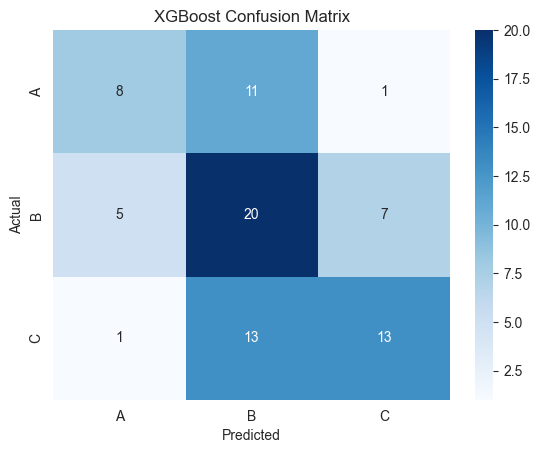

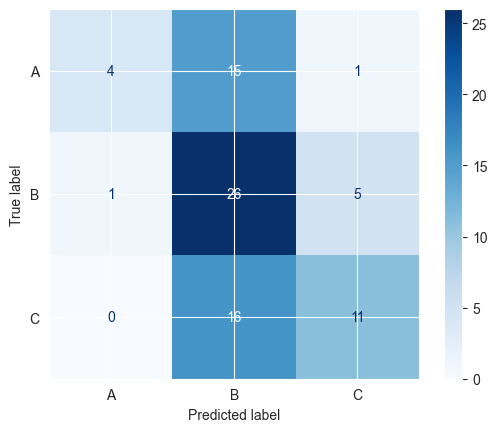

In [19]:
cm = confusion_matrix(y_test_c, y_pred_c_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()
ConfusionMatrixDisplay.from_estimator(clf_rf, X_test_c, y_test_c, display_labels=le.classes_, cmap='Blues', normalize=None)

In [20]:
thresholds = {
    0: 0.30,
    1: 0.45,
    2: 0.28
}

y_proba = clf_xgb.predict_proba(X_test_c)

y_pred_adjusted = []

for probs in y_proba:
    # Check if any class exceeds its threshold
    above_threshold = [i for i, p in enumerate(probs) if p > thresholds[i]]
    if above_threshold:
        # Pick class with highest probability among those above threshold
        y_pred_adjusted.append(above_threshold[np.argmax([probs[i] for i in above_threshold])])
    else:
        # Default to highest probability if none exceed threshold
        y_pred_adjusted.append(np.argmax(probs))

y_pred_adjusted = np.array(y_pred_adjusted)

## Final Notes (Confusion Matrix + Threshold Tuning)

From the confusion matrices, both Random Forest and XGBoost tend to **overpredict class B** (the middle category). This happens because **B is the largest class**, so the models learn it as the safest prediction when they are uncertain. As a result, classes **A** and **C** are the most likely to be misclassified as **B**.

I also experimented with **manually tweaking probability thresholds** for each class to reduce the bias toward class B. This approach can sometimes help catch more minority-class cases (A or C), but in my results it provided **limited improvement** overall because the class boundaries overlap and the features are not strong enough to separate the groups cleanly. In practice, threshold tuning is still useful when the goal is to prioritize specific classes (for example, identifying low-performing students), even if overall accuracy does not increase much.